In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 
from operator import attrgetter
from functools import reduce

# Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

# Tree Graph
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

#
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
df = pd.read_csv("telco.csv")

In [3]:
df.head()

,customerID,Region,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,France,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,France,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,France,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,France,Male,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,France,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Region            7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.describe(include=["O"])

,customerID,Region,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,3,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,6161-UUUTA,Germany,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,6761,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [7]:
for item in df.columns:
    print(item)
    print(df[item].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Region
['France' 'England' 'Germany']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank 

In [8]:
for item in df.columns:
    print(item)
    print(df[item].value_counts())

customerID
6161-UUUTA    1
6992-TKNYO    1
4640-UHDOS    1
6702-OHFWR    1
7688-AWMDX    1
             ..
8735-NBLWT    1
1761-AEZZR    1
2929-QNSRW    1
7080-TNUWP    1
8606-OEGQZ    1
Name: customerID, Length: 7043, dtype: int64
Region
Germany    6761
France      194
England      88
Name: Region, dtype: int64
gender
Male      3555
Female    3488
Name: gender, dtype: int64
SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Nam

In [9]:
for item in df.columns:
    print(item)
    print(np.where(df[item].eq(" ")))

customerID
(array([], dtype=int64),)
Region
(array([], dtype=int64),)
gender
(array([], dtype=int64),)
SeniorCitizen
(array([], dtype=int64),)
Partner
(array([], dtype=int64),)
Dependents
(array([], dtype=int64),)
tenure
(array([], dtype=int64),)
PhoneService
(array([], dtype=int64),)
MultipleLines
(array([], dtype=int64),)
InternetService
(array([], dtype=int64),)
OnlineSecurity
(array([], dtype=int64),)
OnlineBackup
(array([], dtype=int64),)
DeviceProtection
(array([], dtype=int64),)
TechSupport
(array([], dtype=int64),)
StreamingTV
(array([], dtype=int64),)
StreamingMovies
(array([], dtype=int64),)
Contract
(array([], dtype=int64),)
PaperlessBilling
(array([], dtype=int64),)
PaymentMethod
(array([], dtype=int64),)
MonthlyCharges
(array([], dtype=int64),)
TotalCharges
(array([ 488,  753,  936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754],
      dtype=int64),)
Churn
(array([], dtype=int64),)


In [10]:
i = df[df["TotalCharges"] == " "].index
df.loc[i]

,customerID,Region,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Germany,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Germany,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Germany,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Germany,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Germany,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Germany,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Germany,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Germany,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Germany,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Germany,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
df = df.drop(i)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Region            7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 


# Exploratory Data Analysis

In [13]:
# Categorical Features

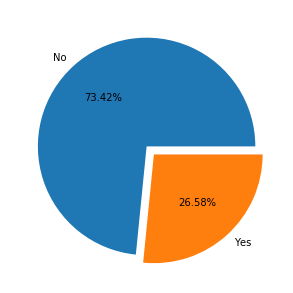

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = plt.pie(df["Churn"].value_counts(), labels=["No", "Yes"], autopct="%1.2f%%", explode=(0, 0.1))
plt.show()

In [15]:
def graph(col):
    df2 = df.groupby([col, "Churn"]).size().reset_index().pivot(columns="Churn", index=col, values=0)
    return df2

[]

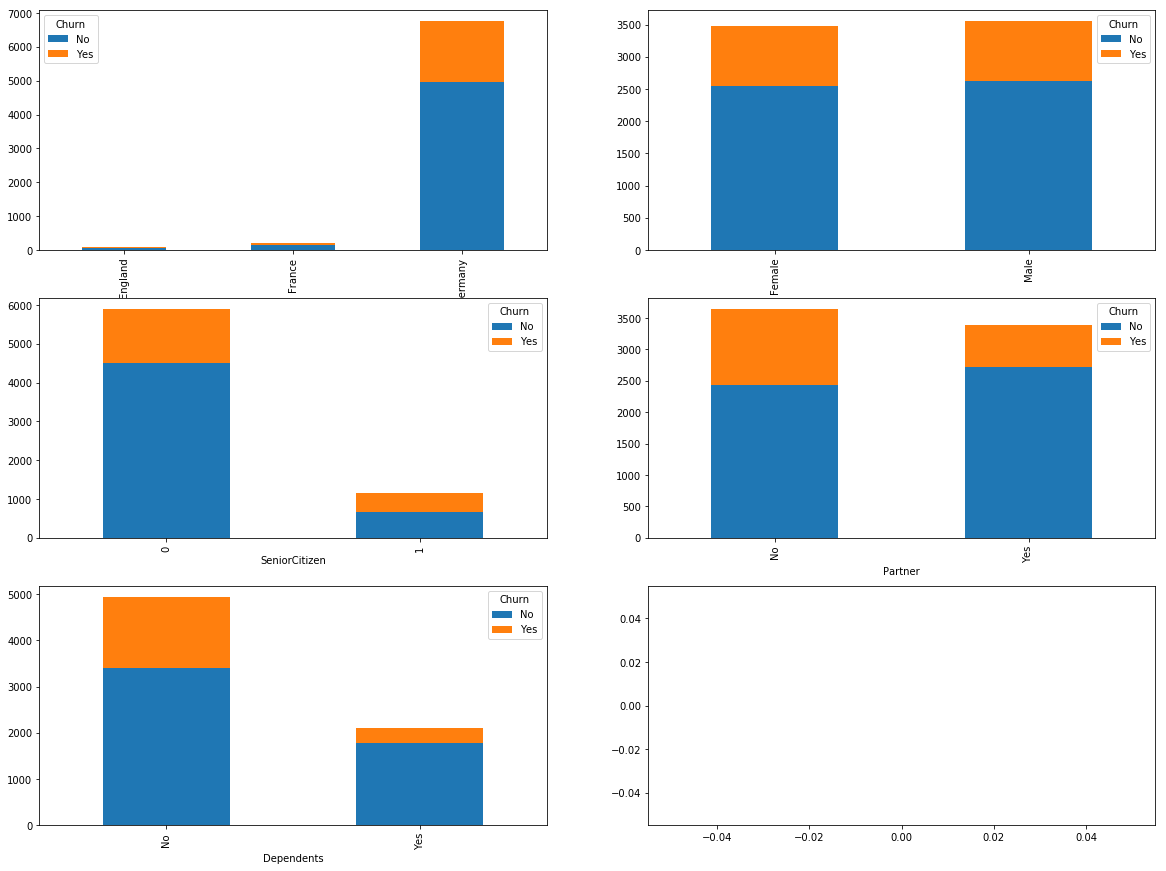

In [16]:
fig, ax = plt.subplots(3, 2, figsize=(20, 15))

graph("Region").plot(kind="bar", stacked=True, ax=ax[0][0])
graph("gender").plot(kind="bar", stacked=True, ax=ax[0][1])
graph("SeniorCitizen").plot(kind="bar", stacked=True, ax=ax[1][0])
graph("Partner").plot(kind="bar", stacked=True, ax=ax[1][1])
graph("Dependents").plot(kind="bar", stacked=True, ax=ax[2][0])
#graph("tenure").plot(kind="bar", stacked=True, ax=ax[2][1])

plt.plot()

[]

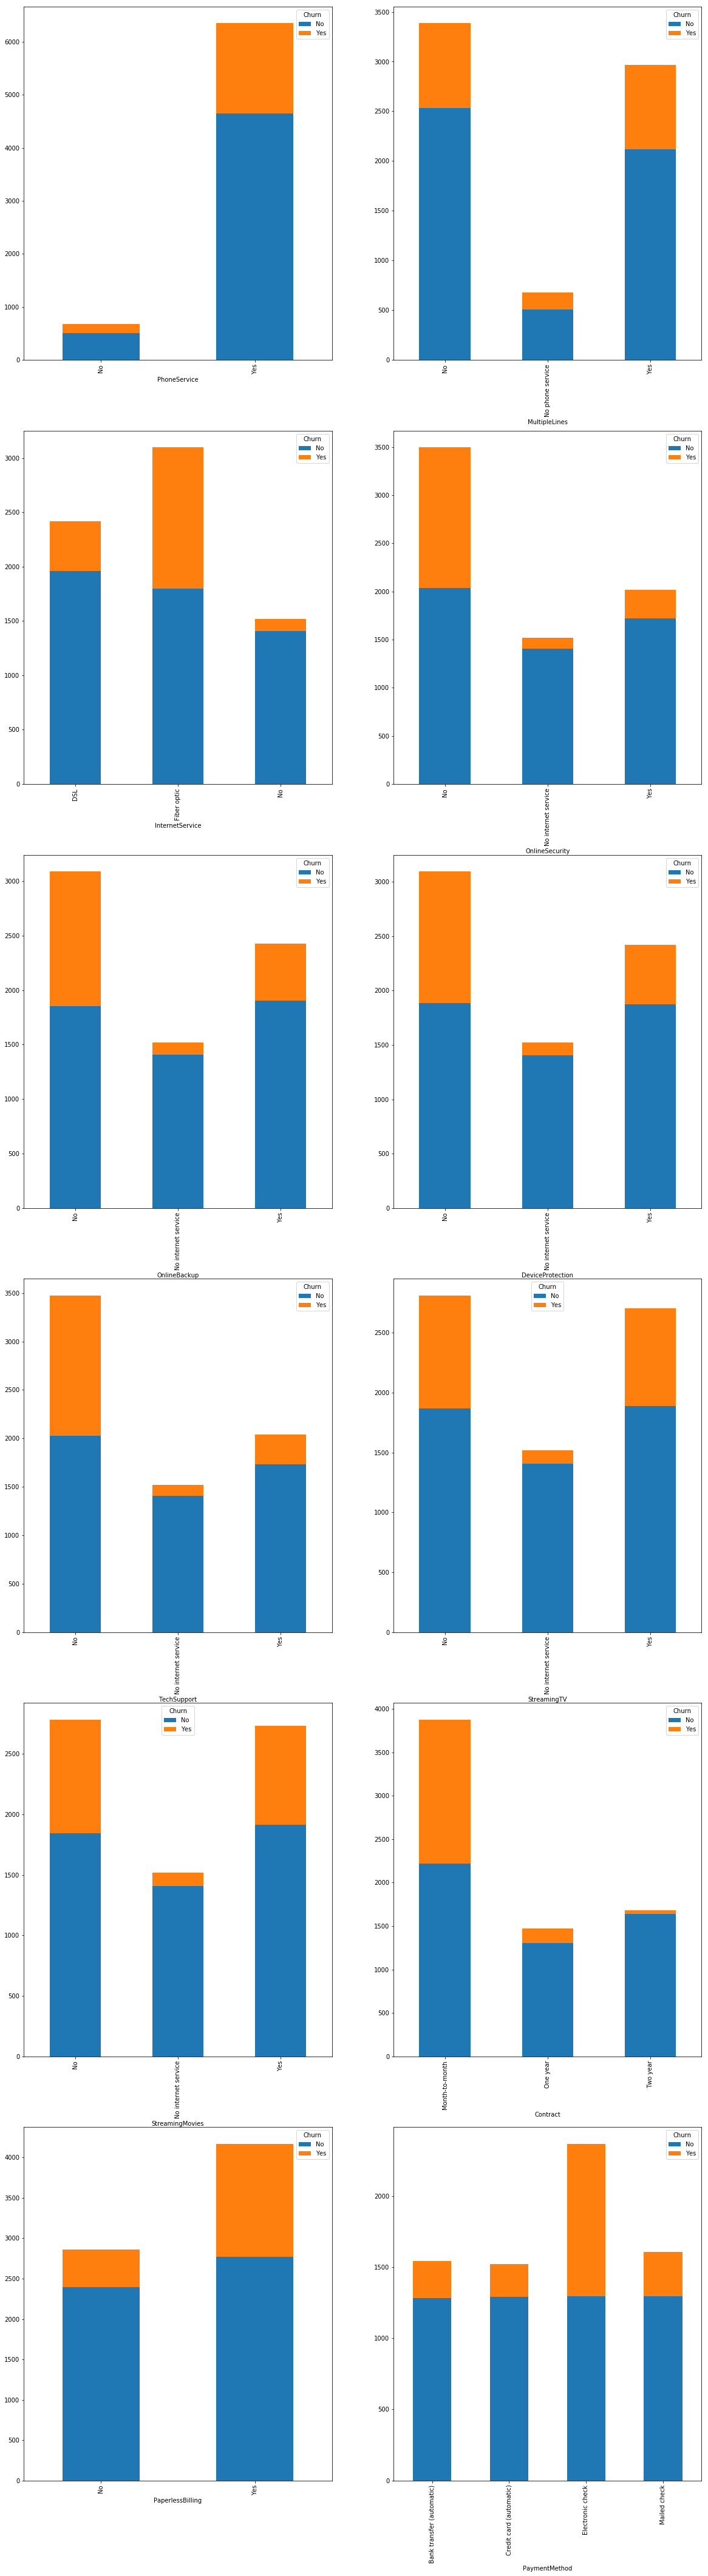

In [17]:
fig, ax = plt.subplots(6, 2, figsize=(20, 75))

graph("PhoneService").plot(kind="bar", stacked=True, ax=ax[0][0])
graph("MultipleLines").plot(kind="bar", stacked=True, ax=ax[0][1])
graph("InternetService").plot(kind="bar", stacked=True, ax=ax[1][0])
graph("OnlineSecurity").plot(kind="bar", stacked=True, ax=ax[1][1])
graph("OnlineBackup").plot(kind="bar", stacked=True, ax=ax[2][0])
graph("DeviceProtection").plot(kind="bar", stacked=True, ax=ax[2][1])
graph("TechSupport").plot(kind="bar", stacked=True, ax=ax[3][0])
graph("StreamingTV").plot(kind="bar", stacked=True, ax=ax[3][1])
graph("StreamingMovies").plot(kind="bar", stacked=True, ax=ax[4][0])
graph("Contract").plot(kind="bar", stacked=True, ax=ax[4][1])
graph("PaperlessBilling").plot(kind="bar", stacked=True, ax=ax[5][0])
graph("PaymentMethod").plot(kind="bar", stacked=True, ax=ax[5][1])

plt.plot()

In [18]:
# Numeric Features

[]

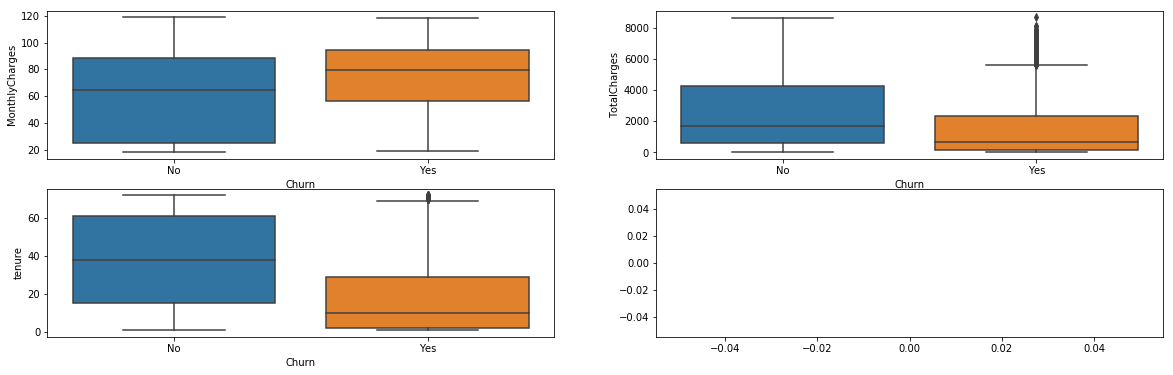

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(20, 6))

sns.boxplot(x="Churn", y="MonthlyCharges", data=df, ax=ax[0][0])
sns.boxplot(x="Churn", y="TotalCharges", data=df, ax=ax[0][1])
sns.boxplot(x="Churn", y="tenure", data=df, ax=ax[1][0])

plt.plot()

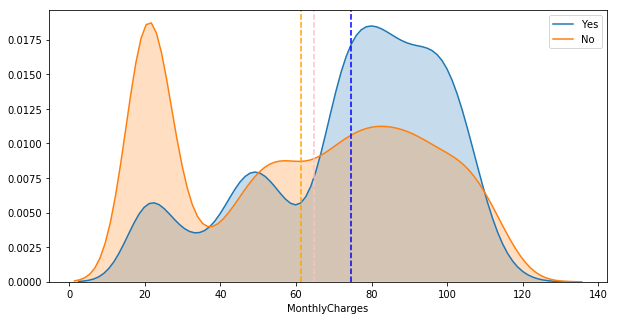

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.kdeplot(df["MonthlyCharges"].loc[df["Churn"] == "Yes"], label="Yes", shade=True)
sns.kdeplot(df["MonthlyCharges"].loc[df["Churn"] == "No"], label="No", shade=True)

plt.axvline(df["MonthlyCharges"].loc[df["Churn"] == "Yes"].mean(), color="blue", linestyle="--")
plt.axvline(df["MonthlyCharges"].loc[df["Churn"] == "No"].mean(), color="orange", linestyle="--")
plt.axvline(df["MonthlyCharges"].mean(), color="pink", linestyle="--")

plt.xlabel("MonthlyCharges")
plt.show()

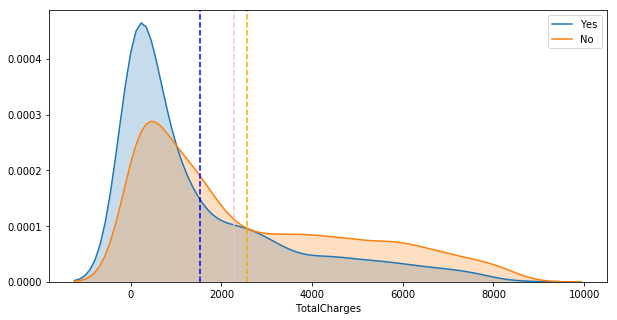

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.kdeplot(df["TotalCharges"].loc[df["Churn"] == "Yes"], label="Yes", shade=True)
sns.kdeplot(df["TotalCharges"].loc[df["Churn"] == "No"], label="No", shade=True)

plt.axvline(df["TotalCharges"].loc[df["Churn"] == "Yes"].mean(), color="blue", linestyle="--")
plt.axvline(df["TotalCharges"].loc[df["Churn"] == "No"].mean(), color="orange", linestyle="--")
plt.axvline(df["TotalCharges"].mean(), color="pink", linestyle="--")

plt.xlabel("TotalCharges")
plt.show()

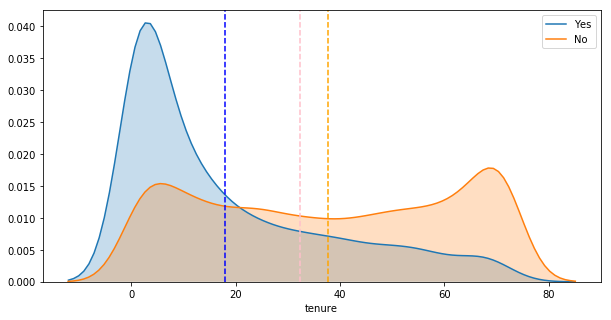

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.kdeplot(df["tenure"].loc[df["Churn"] == "Yes"], label="Yes", shade=True)
sns.kdeplot(df["tenure"].loc[df["Churn"] == "No"], label="No", shade=True)

plt.axvline(df["tenure"].loc[df["Churn"] == "Yes"].mean(), color="blue", linestyle="--")
plt.axvline(df["tenure"].loc[df["Churn"] == "No"].mean(), color="orange", linestyle="--")
plt.axvline(df["tenure"].mean(), color="pink", linestyle="--")

plt.xlabel("tenure")
plt.show()

# QA

In [23]:
def tenure_transform(x):
    if x <= 12:
        x = 0
    elif x <= 24:
        x = 1
    elif x <= 36:
        x = 2 
    elif x <= 48:
        x = 3
    elif x <= 60:
        x = 4
    else:
        x = 5
    return x

In [24]:
df["tenure"] = df["tenure"].apply(tenure_transform)

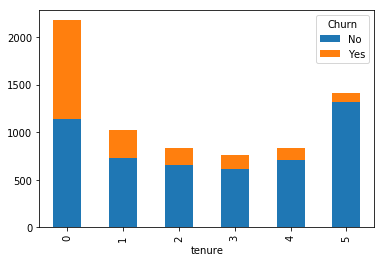

In [25]:
graph("tenure").plot(kind="bar", stacked=True)
plt.show()

In [26]:
service = ["Fiber optic", "DSL"]
female = df.loc[(df["gender"] == "Female") & (df["SeniorCitizen"] == 1) & (df["InternetService"].isin(service))]

In [27]:
female.groupby(["gender", "SeniorCitizen", "InternetService", "Churn"]).size()

gender  SeniorCitizen  InternetService  Churn
Female  1              DSL              No        85
                                        Yes       38
                       Fiber optic      No       225
                                        Yes      199
dtype: int64

In [28]:
df.loc[df["InternetService"] == "Fiber optic"].PhoneService.value_counts()

Yes    3096
Name: PhoneService, dtype: int64

In [29]:
df.groupby(["InternetService", "TechSupport"])["TechSupport"].size()

InternetService  TechSupport        
DSL              No                     1242
                 Yes                    1174
Fiber optic      No                     2230
                 Yes                     866
No               No internet service    1520
Name: TechSupport, dtype: int64

In [30]:
df.groupby(["InternetService", "OnlineSecurity", "Churn"])[["OnlineSecurity"]].count()

OnlineSecurity
InternetService OnlineSecurity      Churn                
DSL             No                  No                893
                                    Yes               347
                Yes                 No               1064
                                    Yes               112
Fiber optic     No                  No               1143
                                    Yes              1114
                Yes                 No                656
                                    Yes               183
No              No internet service No               1407
                                    Yes               113

In [31]:
df.groupby(["InternetService", "OnlineBackup", "Churn"])[["OnlineBackup"]].count()

OnlineBackup
InternetService OnlineBackup        Churn              
DSL             No                  No              991
                                    Yes             343
                Yes                 No              966
                                    Yes             116
Fiber optic     No                  No              863
                                    Yes             890
                Yes                 No              936
                                    Yes             407
No              No internet service No             1407
                                    Yes             113

In [32]:
df.groupby(["InternetService", "TechSupport", "Churn"])[["TechSupport"]].count()

TechSupport
InternetService TechSupport         Churn             
DSL             No                  No             897
                                    Yes            345
                Yes                 No            1060
                                    Yes            114
Fiber optic     No                  No            1129
                                    Yes           1101
                Yes                 No             670
                                    Yes            196
No              No internet service No            1407
                                    Yes            113

In [33]:
df.loc[df["Partner"] == "No"].Churn.value_counts()

No     2439
Yes    1200
Name: Churn, dtype: int64

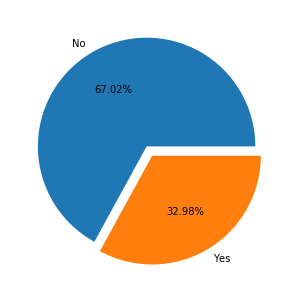

In [34]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = plt.pie(df.loc[df["Partner"] == "No"].Churn.value_counts(), labels=["No", "Yes"], autopct="%1.2f%%", explode=(0, 0.1))
plt.show()

In [35]:
# 1=Yes/Churn, 0=No
def clean_data(value):
    if value == "Yes":
        value = 1
    else:
        value = 0        
    return value

def gender_transform(x):
    if x == "Female":
        x = 0
    else:
        x = 1
    return x

def region_transform(x):
    if x == "Germany":
        x = 0
    elif x == "France":
        x = 1
    else:
        x = 2
    return x

def contract_transform(x):
    if x == "Month-to-month":
        x = 0
    elif x == "Two year":
        x = 1
    else:
        x = 2
    return x

def payment_transform(x):
    if x == "Electronic check":
        x = 0
    elif x == "Mailed check":
        x = 1
    elif x == "Bank transfer (automatic)":
        x = 2
    else:
        x = 3
    return x

In [36]:
col = ["Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", 
       "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", "Churn"]

df2 = df.copy()

df2["InternetService"] = df2["InternetService"].apply(lambda x: x if x == "No" else "Yes")
df2[col] = df2[col].applymap(lambda x: clean_data(x))
df2["gender"] = df["gender"].apply(gender_transform)
df2["Region"] = df["Region"].apply(region_transform)
df2["Contract"] = df["Contract"].apply(contract_transform)
df2["PaymentMethod"] = df["PaymentMethod"].apply(payment_transform)

df2["TotalServices"] = df2.loc[:, "PhoneService": "StreamingMovies"].sum(axis=1)
df["TotalServices"] = df2.loc[:, "PhoneService": "StreamingMovies"].sum(axis=1)

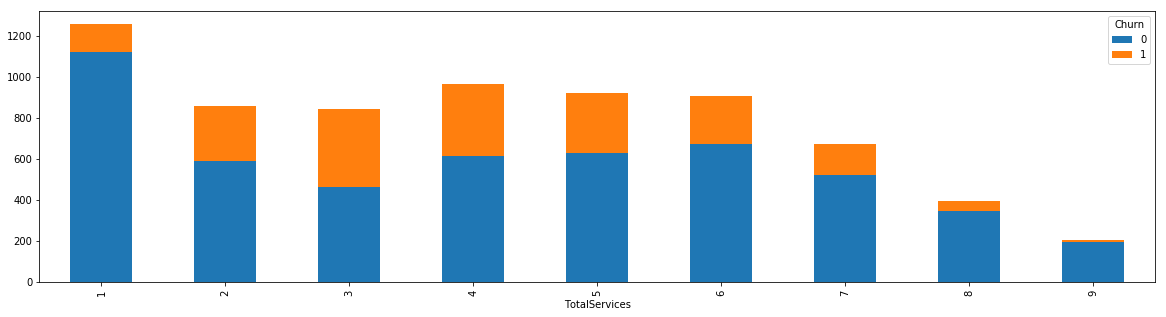

In [37]:
df2.groupby(["TotalServices", "Churn"]).size().reset_index().pivot(columns="Churn", index="TotalServices", values=0)\
.plot(kind="bar", stacked=True, figsize=(20, 5))
plt.show()

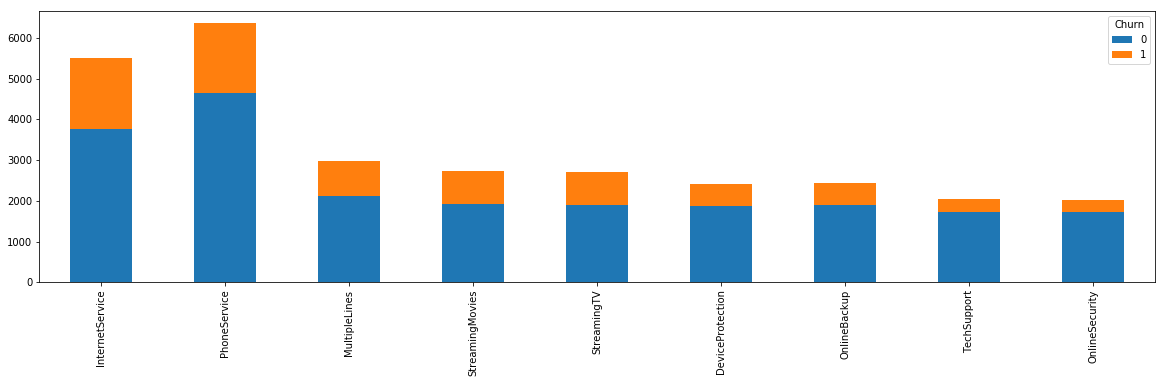

In [38]:
col = ["PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", 
       "TechSupport", "StreamingTV", "StreamingMovies", "Churn"]
services = df2[col]

# sum only use service
services_graph = services.groupby(["Churn"]).sum().T.sort_values(1, ascending=False)

ax = services_graph.plot(kind="bar", stacked=True, figsize=(20, 5))
plt.show()

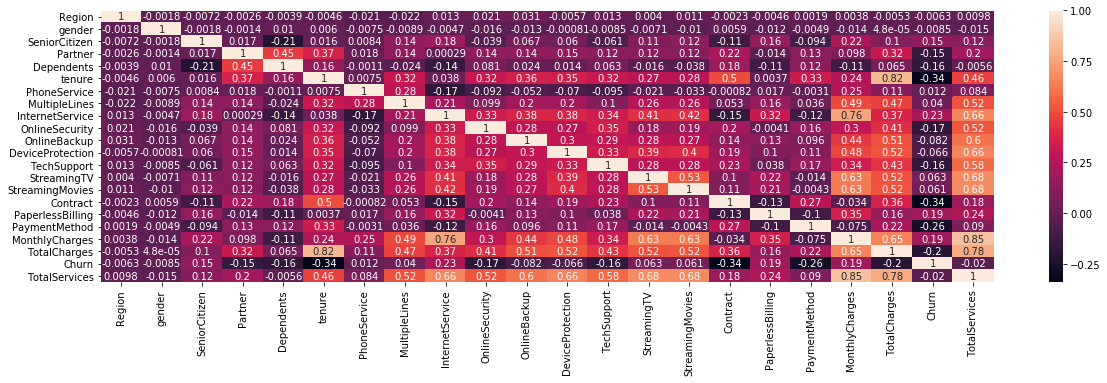

In [39]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.heatmap(df2.drop("customerID", axis=1).corr(), annot=True)
plt.show()

# Predictive Modeling

In [40]:
df2 = df.copy()

col = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df2[col] = df2[col].applymap(lambda x: x if x == "Yes" else "No")

In [41]:
# Encode labels with value between 0 and 1
le = preprocessing.LabelEncoder()
df2["Churn"] = le.fit_transform(df2["Churn"].values)

In [42]:
# Encode categorical features
categorical =  ["Region", "gender", "SeniorCitizen", "Partner", "Dependents", "tenure", "PhoneService", "MultipleLines",
                "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", 
                "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "TotalServices"]

for col in categorical:
    dummies = pd.get_dummies(df2[col], prefix=col, prefix_sep="_")
    df2 = pd.concat([df2, dummies], axis=1)

df2.drop(categorical, axis=1, inplace=True)

In [43]:
for item in df2.loc[:, df2.columns != "customerID"].columns:
    df2[item] = pd.to_numeric(df2[item])

In [44]:
df2.head()

,customerID,MonthlyCharges,TotalCharges,Churn,Region_England,Region_France,Region_Germany,gender_Female,gender_Male,SeniorCitizen_0,...,PaymentMethod_Mailed check,TotalServices_1,TotalServices_2,TotalServices_3,TotalServices_4,TotalServices_5,TotalServices_6,TotalServices_7,TotalServices_8,TotalServices_9
0,7590-VHVEG,29.85,29.85,0,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
1,5575-GNVDE,56.95,1889.50,0,0,1,0,0,1,1,...,1,0,0,0,1,0,0,0,0,0
2,3668-QPYBK,53.85,108.15,1,0,1,0,0,1,1,...,1,0,0,0,1,0,0,0,0,0
3,7795-CFOCW,42.30,1840.75,0,0,1,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
4,9237-HQITU,70.70,151.65,1,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0


# Feature Engineering

In [45]:
df2.columns

Index(['customerID', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Region_England', 'Region_France', 'Region_Germany', 'gender_Female',
       'gender_Male', 'SeniorCitizen_0', 'SeniorCitizen_1', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'tenure_0',
       'tenure_1', 'tenure_2', 'tenure_3', 'tenure_4', 'tenure_5',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank trans

In [46]:
X = df2[["MonthlyCharges", "TotalCharges", "Region_England", "Region_France", "Region_Germany", "gender_Female", "gender_Male", 
         "SeniorCitizen_0", "SeniorCitizen_1", "Partner_No", "Partner_Yes", "Dependents_No", "Dependents_Yes", "tenure_0",
         "tenure_1", "tenure_2", "tenure_3", "tenure_4", "tenure_5", "PhoneService_No", "PhoneService_Yes", "MultipleLines_No",
         "MultipleLines_No phone service", "MultipleLines_Yes", "InternetService_DSL", "InternetService_Fiber optic",
         "InternetService_No", "OnlineSecurity_No", "OnlineSecurity_Yes", "OnlineBackup_No", "OnlineBackup_Yes", 
         "DeviceProtection_No", "DeviceProtection_Yes", "TechSupport_No", "TechSupport_Yes", "StreamingTV_No", 
         "StreamingTV_Yes", "StreamingMovies_No", "StreamingMovies_Yes", "Contract_Month-to-month", "Contract_One year",
         "Contract_Two year", "PaperlessBilling_No", "PaperlessBilling_Yes", "PaymentMethod_Bank transfer (automatic)",
         "PaymentMethod_Credit card (automatic)", "PaymentMethod_Electronic check", "PaymentMethod_Mailed check",
         "TotalServices_1", "TotalServices_2", "TotalServices_3", "TotalServices_4", "TotalServices_5", "TotalServices_6",
         "TotalServices_7", "TotalServices_8", "TotalServices_9"]]

y = df2["Churn"]

In [47]:
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [48]:
model.score(X, y)

0.9975824800910125

In [49]:
model.feature_importances_

array([1.96791239e-01, 2.42311942e-01, 2.71019646e-03, 3.36151579e-03,
       4.46484205e-03, 1.20305168e-02, 1.72538340e-02, 5.73424436e-03,
       1.14966019e-02, 1.04757446e-02, 1.18457553e-02, 1.12521971e-02,
       9.15658387e-03, 3.09373057e-03, 3.19976239e-03, 2.53823895e-03,
       4.93114269e-03, 1.68511705e-03, 1.47516683e-03, 2.82204450e-03,
       2.12960092e-04, 6.33500480e-03, 5.50291292e-04, 6.79814327e-03,
       1.13024877e-03, 4.90064751e-02, 1.25095934e-02, 9.38521274e-03,
       1.13919018e-02, 9.20350925e-03, 1.05063964e-02, 1.03571634e-02,
       7.86758519e-03, 8.54812882e-03, 1.18758984e-02, 3.85091384e-03,
       4.07699329e-03, 5.86099776e-03, 3.50650003e-03, 1.64793316e-01,
       0.00000000e+00, 4.43445333e-03, 1.35026792e-02, 8.95324414e-03,
       8.49792866e-03, 7.39153689e-03, 2.13433781e-02, 1.14504305e-02,
       9.17152154e-04, 2.15387649e-03, 4.95102089e-03, 4.84140869e-03,
       7.69688739e-03, 2.77811106e-03, 3.99462821e-03, 6.95614884e-04,
      

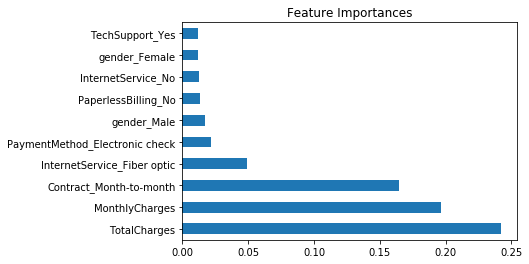

In [50]:
fs = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True)
fs.nlargest(10).plot(kind="barh")
plt.title("Feature Importances")
plt.show()

In [51]:
cols = ["TotalCharges", "MonthlyCharges", "Contract_Month-to-month", "InternetService_Fiber optic"]
X = df2[cols]
y = df2["Churn"]

In [52]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=64)

In [54]:
decision_tree = DecisionTreeClassifier()

param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
    "min_samples_split": [20, 25, 30, 35, 40],
    "min_samples_leaf": [1, 2, 3, 4, 5, 6]
}

tree_cv = GridSearchCV(decision_tree, param_grid, cv=5)
tree_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [55]:
print(f"Best Parameters: {tree_cv.best_params_}")
print(f"Best Score: {tree_cv.best_score_}")

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 20}
Best Score: 0.7848460649581115


In [56]:
decision_tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_leaf=4, min_samples_split=20)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [57]:
y_predict = decision_tree.predict(X_test)

In [58]:
y_pred_prob = decision_tree.predict_proba(X_test)[:, 1]

Accuracy: 79.33649289099526
Confusion Matrix:
[[1356  206]
 [ 230  318]]


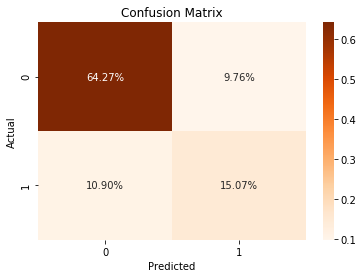

In [59]:
print("Accuracy: {}".format(accuracy_score(y_test, y_predict) * 100))


cf_matrix = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(cf_matrix)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt=".2%", cmap="Oranges")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

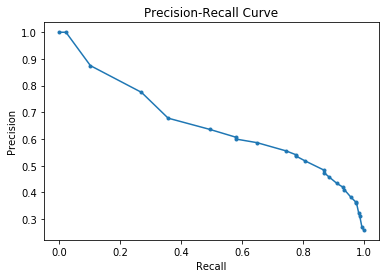

In [60]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.plot(recall, precision, marker=".")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

ROC AUC: 0.8443414301335552


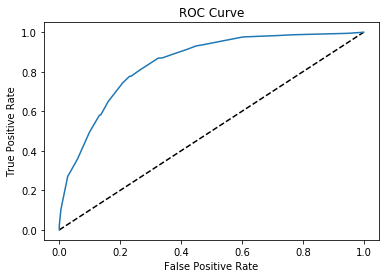

In [61]:
print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

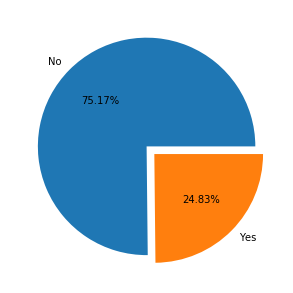

In [62]:
df_compare = pd.DataFrame({"Actual": y_test, "Predicted": y_predict})

fig, ax = plt.subplots(figsize=(10, 5))
ax = plt.pie(df_compare["Predicted"].value_counts(), labels=["No", "Yes"], autopct="%1.2f%%", explode=(0, 0.1))
plt.show()

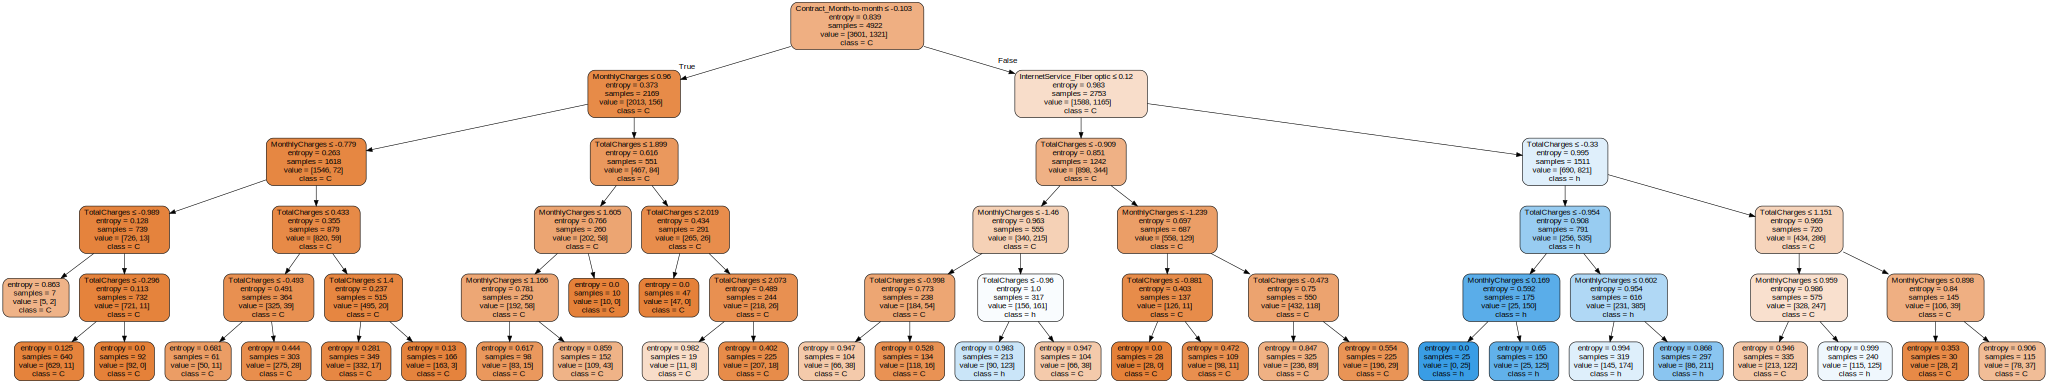

'tree.png'

In [65]:
graph = Source(export_graphviz(decision_tree, out_file=None, filled=True, rounded=True, special_characters=True, 
                               feature_names=cols, class_names="Churn"))

display(SVG(graph.pipe(format="svg")))
graph.format = "png"
graph.render("tree", view=True)